# eCrad build and run tests

*2024-06-27*

References:

- <https://github.com/ecmwf-ifs/ecrad>
- <https://github.com/ecmwf-ifs/fiat>
- <https://confluence.ecmwf.int/display/ECRAD>
- <https://confluence.ecmwf.int/display/ECRAD/ecRad+practical>
- <https://github.com/ecmwf-ifs/ecrad/blob/master/practical/ecrad_practical.pdf>

In [27]:
from PIL import Image
from IPython.display import display

Dependencies:

In [4]:
! pip install netcdf4

  Using cached netCDF4-1.7.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.9 MB/s eta 0:00:00


In [13]:
! apt install libnetcdff-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libnetcdff7
Suggested packages:
  netcdf-bin netcdf-doc
The following NEW packages will be installed:
  libnetcdff-dev libnetcdff7
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 460 kB of archives.
After this operation, 1,801 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libnetcdff7 amd64 4.5.4+ds-1 [134 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libnetcdff-dev amd64 4.5.4+ds-1 [325 kB]
Fetched 460 kB in 1s (422 kB/s)
Selecting previously unselected package libnetcdff7.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../libnetcdff7_4.5.4+ds-1_amd64.deb ...
Unpacking libnetcdff7 (4.5.4+ds-1) ...
Selecting previously unselected package libnetcdff-dev.
Preparing to unpack .../libnetcdff-dev

Get the source code and build:

In [5]:
! git clone https://github.com/ecmwf-ifs/ecrad

Cloning into 'ecrad'...
remote: Enumerating objects: 5226, done.
remote: Counting objects: 100% (1340/1340), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 5226 (delta 1169), reused 1209 (delta 1103), pack-reused 3886
Receiving objects: 100% (5226/5226), 24.44 MiB | 27.06 MiB/s, done.
Resolving deltas: 100% (3748/3748), done.


In [10]:
%cd ecrad

/content/ecrad


In [14]:
! make

*** Using nf-config to obtain NetCDF flags
*** No "PROFILE" variable provided, assuming "gfortran"
*** Building with NetCDF4/HDF5 support
cd ifsaux && make
make[1]: Entering directory '/content/ecrad/ifsaux'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/ecrad/ifsaux'
cd drhook && make dummy
make[1]: Entering directory '/content/ecrad/drhook'
make[1]: Nothing to be done for 'dummy'.
make[1]: Leaving directory '/content/ecrad/drhook'
cd utilities && make
make[1]: Entering directory '/content/ecrad/utilities'
gfortran -Wall -Wno-unused-label -Wno-unused-dummy-argument -Wno-unused-variable -J../mod -fno-range-check -cpp -DNC_NETCDF4 -I../include -O3 -g -ffpe-trap=invalid,zero,overflow -I/usr/include -I/usr/include -fopenmp -c easy_netcdf.F90
easy_netcdf.F90:1693:67:

 1693 |       allocate(var_permute(ndimlen1, ndimlen2, ndimlen3, ndimlen4))
      |                                                                   ^
easy_netcdf.F90:1632:71:

 1632 |     intege

In [16]:
%cd bin

/content/ecrad/bin


In [19]:
! ./ecrad --help

STOP Usage: ecrad config.nam input_file.nc output_file.nc


In [21]:
%cd ../practical

/content/ecrad/practical


In [22]:
! ./ecrad --help

STOP Usage: ecrad config.nam input_file.nc output_file.nc


In [23]:
! ./ecrad config.nam era5slice.nc control.nc

-------------------------- OFFLINE ECRAD RADIATION SCHEME --------------------------
Copyright (C) 2014- ECMWF
Contact: Robin Hogan (r.j.hogan@ecmwf.int)
Floating-point precision: double
General settings:
  Data files expected in "data"
  Clear-sky calculations are ON                              (do_clear=T)
  Saving intermediate radiative properties OFF               (do_save_radiative_properties=F)
  Saving spectral flux profiles OFF                          (do_save_spectral_flux=F)
  Shortwave gas model is "RRTMG-IFS"                         (i_gas_model_sw=1)
  Longwave gas model is "RRTMG-IFS"                          (i_gas_model_lw=1)
  Aerosols are ON                                            (use_aerosols=T)
  General aerosol optics OFF                                 (use_general_aerosol_optics=F)
  Clouds are ON
  Do cloud/aerosol/surface SW properties per g-point ON      (do_cloud_aerosol_per_sw_g_point=T)
  Do cloud/aerosol/surface LW properties per g-point ON      (do_

In [24]:
! ./plot_output.py era5slice.nc control.nc

Plotting output to ./era5slice_control.png


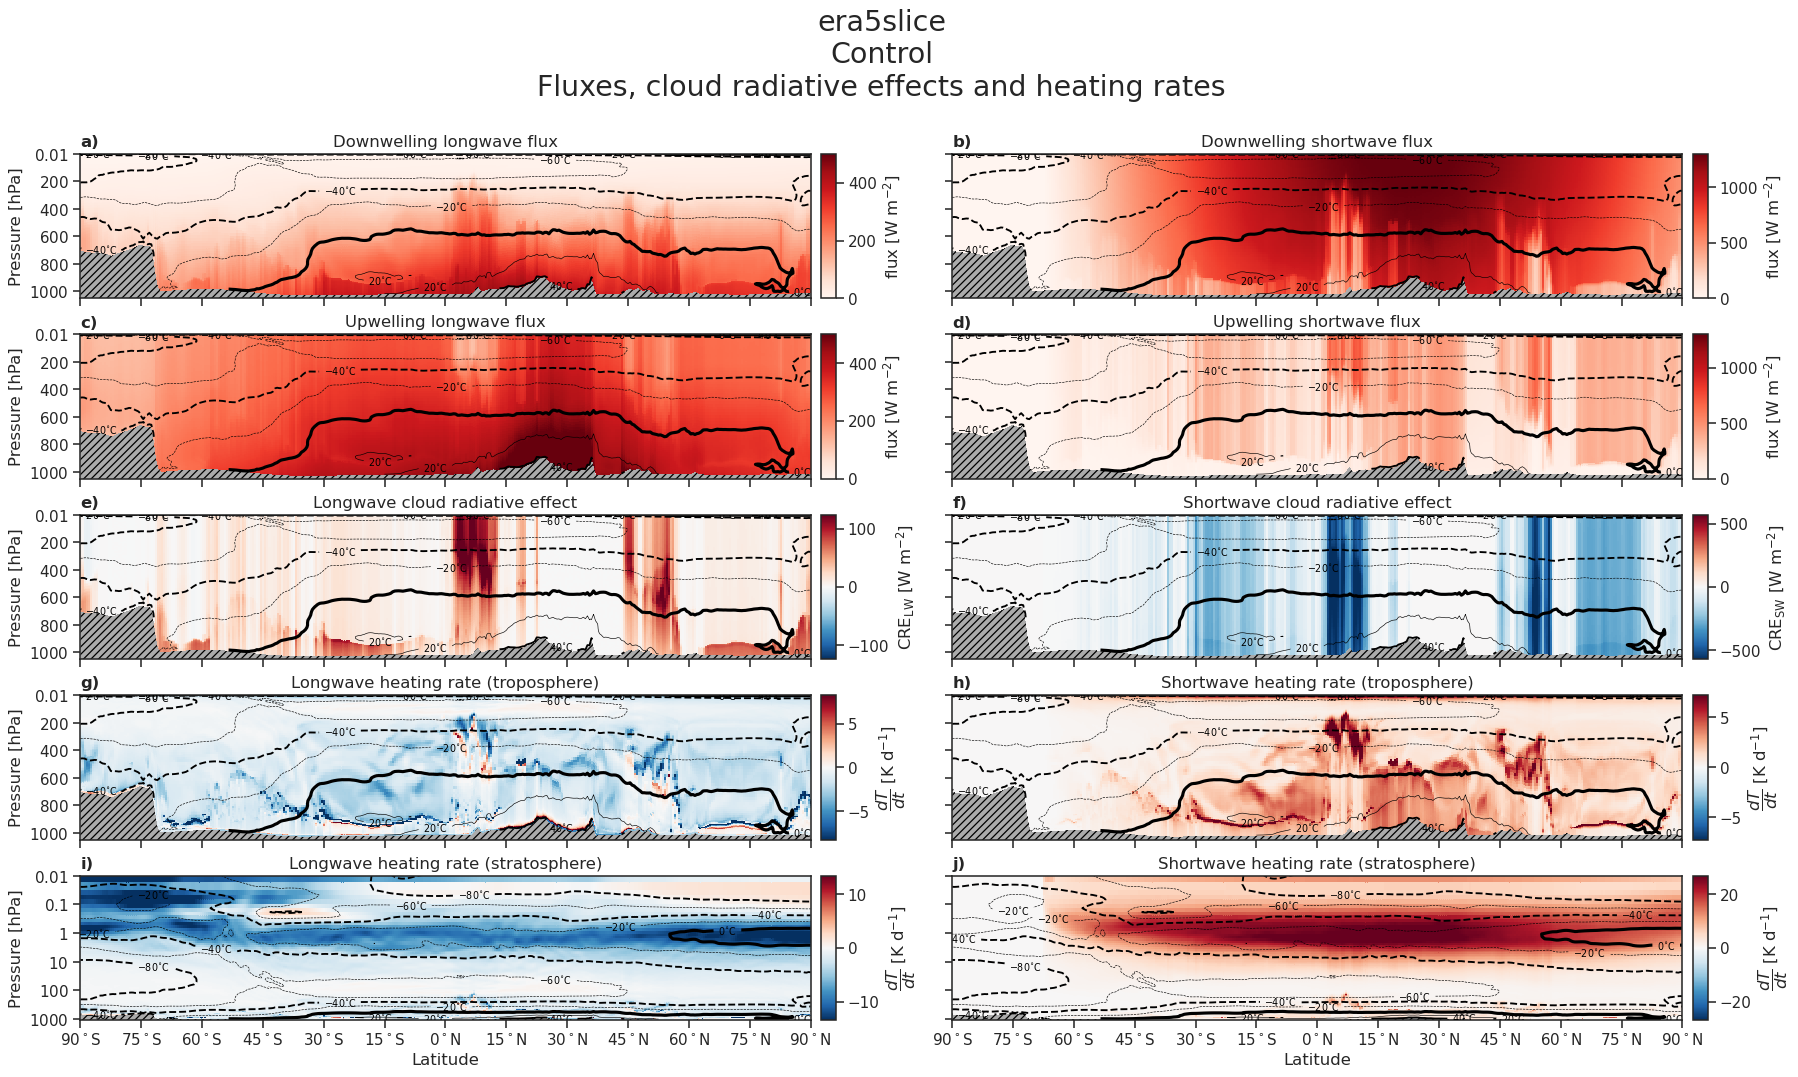

In [29]:
display(Image.open('era5slice_control.png'))

To plot profiles of the outputs at a latitude of 10◦N :

In [26]:
! ./plot_output_profile.py 10 era5slice.nc control.nc

Plotting output profiles to ./era5slice_control_profile_10N.png


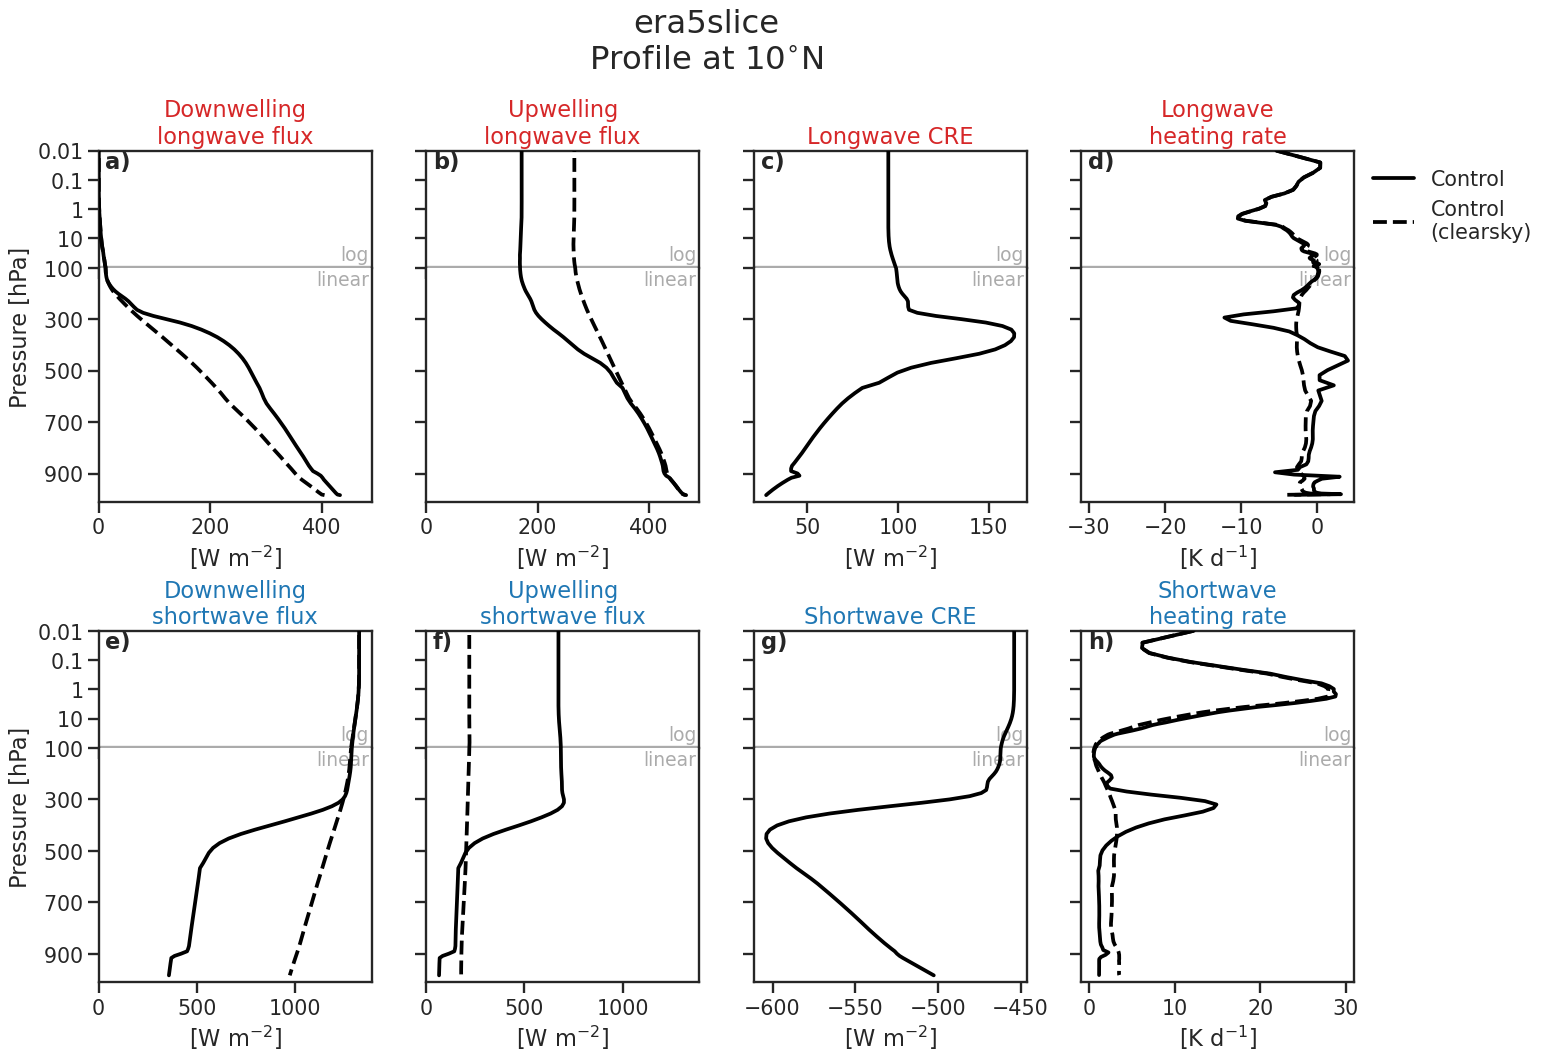

In [28]:
display(Image.open('era5slice_control_profile_10N.png'))

Plots the surface and top-of-atmosphere fluxes for all latitudes:

In [31]:
! ./plot_output_scalar.py era5slice.nc control.nc

Plotting integrated and TOA outputs to .//era5slice_control_surface_and_TOA.png


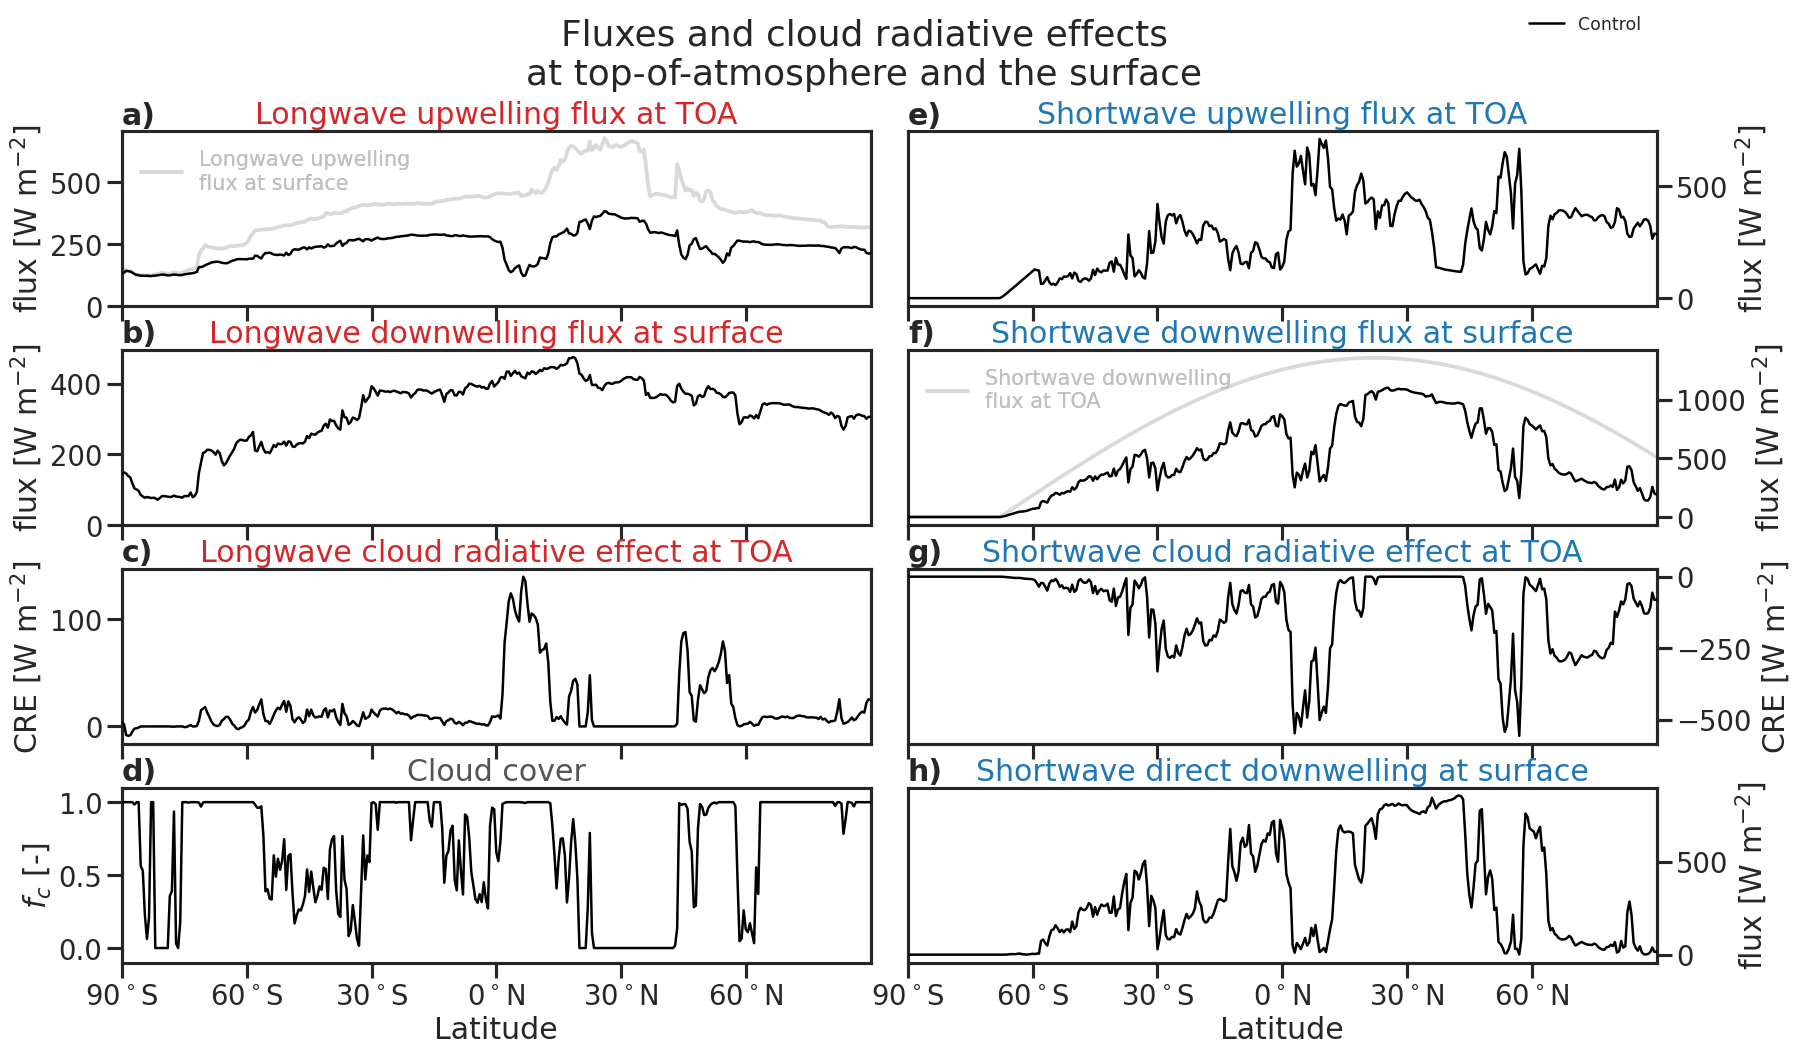

In [32]:
display(Image.open('era5slice_control_surface_and_TOA.png'))

In [33]:
! ./plot_input_profile.py 10 era5slice.nc

Plotting inputs profile to ./era5slice_profile_10N.png


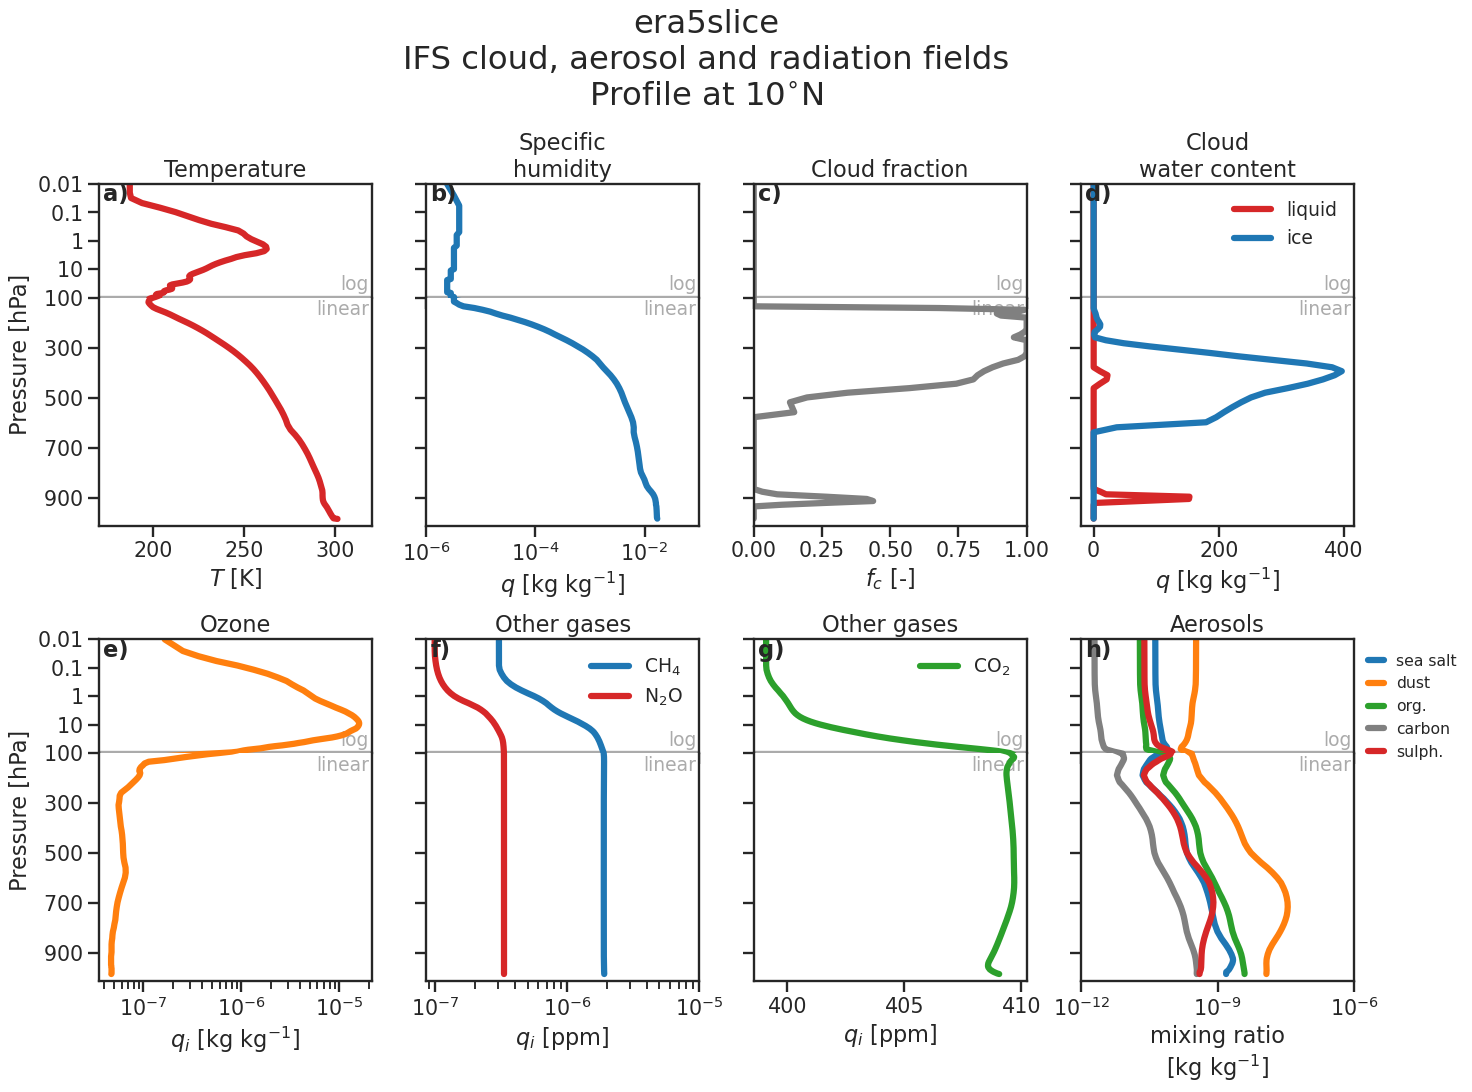

In [34]:
display(Image.open('era5slice_profile_10N.png'))